## <b><span style="color:green">DATA DEFINITION LANGUAGE STATEMENTS (DDL)</span></b>
---
### <b>(i) CREATE</b>
<code><b>CREATE TABLE</b></code> author(\
      author_id CHAR(2) <code>PRIMARY KEY</code> NOT NULL\
      last_name VARCHAR(24) NOT NULL\
    );

### <b>(ii) ALTER</b>
<code><b>ALTER TABLE</b></code> author\
      <b>ADD COLUMN</b> ISBN INTEGER\
      <b>ADD COLUMN</b> ...  ...;\
<code><b>ALTER TABLE</b></code> author\
      <b>ALTER COLUMN</b> ISBN <b>SET DATA TYPE</b> CHAR(20);\
<code><b>ALTER TABLE</b></code> author\
      <b>DROP COLUMN</b> ISBN;\
<code><b>ALTER TABLE</b></code> author\
      <b>RENAME COLUMN</b> ISBN <b>TO</b> ISBN_adjust;

### <b>(iii) DROP</b>
<code><b>DROP TABLE</b></code> author;       <u># Delete entire table</u>

### <b>(iv) TRUNCATE</b>
<code><b>TRUNCATE TABLE</b></code> author IMMIDIATE;       <u># Delete content of table</u>




## <b><span style='color:green'>DATA MANIPULATION LANGUAGE STATEMENTS (DML)</span></b>
----------------------------------------------------------------------------------
### <b>(i) SELECT</b>
<code><b>SELECT</b></code> * <code><b>FROM</b></code> data WHERE SCORE <code><b>BETWEEN</b></code> 100 AND 200;\
<code><b>SELECT</b></code> * <code><b>FROM</b></code> data WHERE ID <code><b>IN</b></code> ('IX','X');\
<code><b>SELECT</b></code> * <code><b>FROM</b></code> data WHERE AUTHOR <code><b>LIKE</b></code> 'R%';     <u># Name start with R</u>

<code><b>SELECT</b></code> * <code><b>FROM</b></code> data <code><b>ORDER BY</b></code> ID <code><b>DESC</b></code>;\
<code><b>SELECT</b></code> * <code><b>FROM</b></code> data <code><b>ORDER BY</b></code> 2;     <u># Column 2</u>

<code><b>SELECT DISTINCT</b></code> ID <code><b>FROM</b></code> data;\
<code><b>SELECT</b></code> ID, COUNT(ID) <code><b>FROM</b></code> data <code><b>GROUP BY</b></code> ID <code><b>HAVING</b></code> COUNT(ID)>2;

### <b>(ii) INSERT</b>
<code><b>INSERT INTO</b></code> table_name('col1',...)\
<code><b>VALUES</b></code> (...);

### <b>(iii) DELETE</b>
<code><b>DELETE FROM</b></code> table_name\
<code><b>WHERE</b></code> CONDITIONS;

## <b><span style='color:green'>BUILD IN FUNCTIONS IN SQL</span></b>
----------------------------------------------------------------------------------
|AGGREGATE FUNCTIONS|SCALAR FUNCTIONS|DATE TIME FUNCTIONS|
|-------------------|----------------|-------------------|
|SUM, AVG, MIN, MAX|ROUND, LENGTH, UCASE, LCASE|YEAR, MONTH, DAY, WEEK, HOUR, MINUTE, SECOND, DAYOFYEAR, DAYOFMONTH, DAYOFWEEK, CURRENT_DATE, CURRENT_TIME|




## <b><span style='color:green'>OTHER FUNCTIONS IN SQL</span></b>
---
![](get_ListofTable.png)

---
# <b><span style='color:blue'>2. SUB-QUERIES</span></b>
---
### <b>CROSS JOIN (CARTESIAN JOIN)</b>
<code><b>SELECT</b></code> * <code><b>FROM</b></code> data <code><b>WHERE</b></code> SALARY < (<code><b>SELECT</b></code> AVG(SALARY) <code><b>FROM</b></code> data);\
### <b>INNER JOIN</b>
<code><b>SELECT</b></code> D1.EMP_ID, D2.DEP_NAME <code><b>FROM</b></code> data1 D1, data2 D2 <code><b>WHERE</b></code> D1.EMP_ID = D2.EMP_ID;\









---
# <b><span style='color:blue'>3. SQL API</span></b>
---

|||
|-|-|
|![](SQL_API_queries.png)|![](APIs.png)|
|![](DB_API.png)|![](Connnection_Method.png)|
|![](Cursor_Method.png)|![](Write_Code.png)|


## <b><span style='color:green'>CODE TO CONNECT AND EXECUTE SQL QUERIES BY SQLITE3 IN PYTHON</span></b>
---

In [1]:
# CONNECT TO SQL DATABASE
import os
import sqlite3

conn = sqlite3.connect('INSTRUCTOR.db')
cursor_obj = conn.cursor()

In [2]:
# CREATE TABLE
cursor_obj.execute('DROP TABLE IF EXISTS INSTRUCTOR')
cursor_obj.execute('''CREATE TABLE INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20) NOT NULL, 
LNAME VARCHAR(20) NOT NULL, CITY VARCHAR(20) NOT NULL, CCODE CHARACTER(2));''')
print('Table is ready')


Table is ready


In [3]:
# EXECUTE QUERIES
cursor_obj.execute('''INSERT INTO INSTRUCTOR VALUES(1, 'Rav', 'Ahuja', 'Toronto', 'CA'), 
(2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US');''')
cursor_obj.execute('''SELECT * FROM INSTRUCTOR''')
op = cursor_obj.fetchmany(2)
print(op)
cursor_obj.execute('''SELECT FNAME FROM INSTRUCTOR''')
op = cursor_obj.fetchall()
print(op)

[(1, 'Rav', 'Ahuja', 'Toronto', 'CA'), (2, 'Raul', 'Chong', 'Markham', 'CA')]
[('Rav',), ('Raul',), ('Hima',)]


In [4]:
# RETRIEVE DATA INTO DATAFRAME
import pandas as pd
df = pd.read_sql_query('SELECT * FROM INSTRUCTOR', conn)
display(df)

,ID,FNAME,LNAME,CITY,CCODE
0,1,Rav,Ahuja,Toronto,CA
1,2,Raul,Chong,Markham,CA
2,3,Hima,Vasudevan,Chicago,US


In [5]:
# CLOSE CONNECTION
conn.close()

---
# <b><span style='color:blue'>4. IMB DB2 DATABASE</span></b>
---
### <span style='color:red'>library: Ibm_db</span></b>
|||
|-|-|
|![](ibm_db2_conn.png)|![](ibm_db2_conn_code.png)|

---
# <b><span style='color:blue'>5. SQL MAGIC</spand></b>
---

In [6]:
import csv, sqlite3
conn = sqlite3.connect('SQLiteMagic.db')
cur = conn.cursor()

In [16]:
#!pip install ipython-sql -q
# pip install --only-binary :all: greenlet
%load_ext sql

In [17]:
# Connect to created SQL database
%sql sqlite:///SQLiteMagic.db

In [ ]:
# Create table

In [18]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)

 * sqlite:///SQLiteMagic.db
Done.
99 rows affected.


[]

In [19]:
%sql SELECT * FROM INTERNATIONAL_STUDENT_TEST_SCORES;

 * sqlite:///SQLiteMagic.db
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


In [77]:
high_score = %sql SELECT country, SUM(CASE WHEN test_score>53 THEN 1 ELSE 0 END) AS freq FROM INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY country HAVING freq>0;
high_score =  high_score.DataFrame()

 * sqlite:///SQLiteMagic.db
Done.


,country,freq
0,Canada,1
1,China,4
2,France,1
3,Indonesia,1
4,Ireland,1
5,Niger,1
6,Philippines,1
7,Portugal,1
8,Sweden,1
9,Uganda,1


/Users/meowbi/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/meowbi/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/meowbi/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='country', ylabel='freq'>

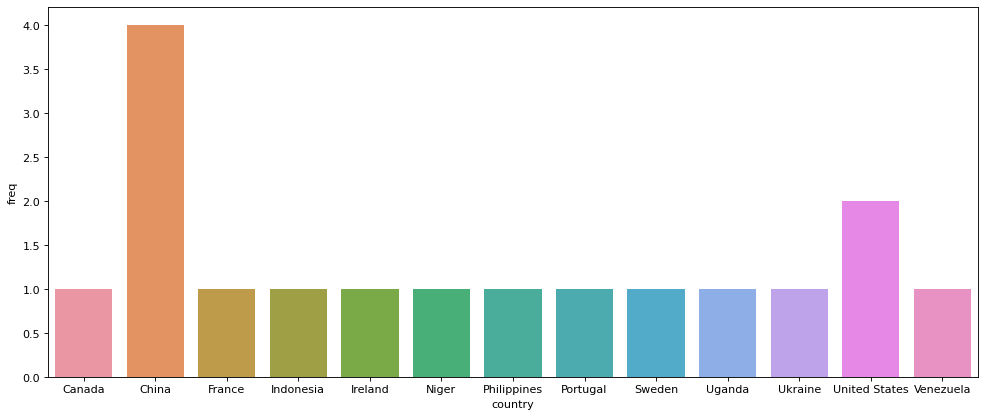

In [82]:
display(high_score)

import seaborn
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80)
seaborn.barplot(x='country', y='freq', data=high_score)

# <b><span style='color:blue'>6. ANALYZING REAL WORLD DATA</span></b>

In [83]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [102]:
import csv, sqlite3
import pandas as pd
import seaborn as sns

conn = sqlite3.connect('ChicagoSocEco.db')
cur = conn.cursor()
%sql sqlite:///ChicagoSocEco.db

In [91]:
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql('ChicagoSocEco_data', conn, if_exists='replace', index=False, method='multi')

78

In [263]:
%sql SELECT * FROM ChicagoSocEco_data;

In [95]:
%sql SELECT COUNT(*) FROM ChicagoSocEco_data;

 * sqlite:///ChicagoSocEco.db
   sqlite:///SQLiteMagic.db
Done.


COUNT(*)
78


In [96]:
%sql SELECT COUNT(*) FROM ChicagoSocEco_data WHERE hardship_index>50

 * sqlite:///ChicagoSocEco.db
   sqlite:///SQLiteMagic.db
Done.


COUNT(*)
38


In [98]:
%sql SELECT community_area_name FROM ChicagoSocEco_data WHERE hardship_index = (SELECT MAX(hardship_index) FROM ChicagoSocEco_data);

 * sqlite:///ChicagoSocEco.db
   sqlite:///SQLiteMagic.db
Done.


community_area_name
Riverdale


In [101]:
%sql SELECT community_area_name FROM ChicagoSocEco_data WHERE per_capita_income_>60000;

 * sqlite:///ChicagoSocEco.db
   sqlite:///SQLiteMagic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


 * sqlite:///ChicagoSocEco.db
   sqlite:///SQLiteMagic.db
Done.


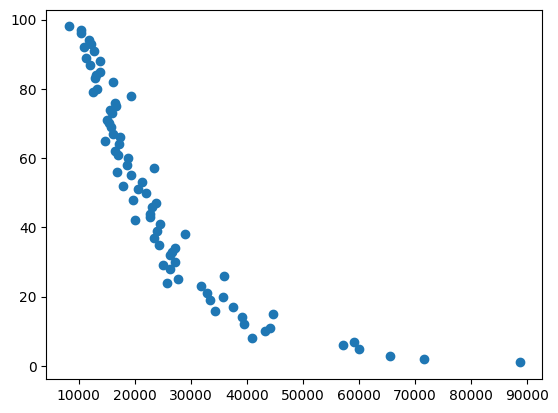

In [103]:
import matplotlib.pyplot as plt
data = %sql SELECT per_capita_income_, hardship_index FROM ChicagoSocEco_data;
data = data.DataFrame()
plt.scatter(x='per_capita_income_', y='hardship_index', data=data)

/Users/meowbi/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/meowbi/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/meowbi/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/meowbi/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

Text(37.722222222222214, 0.5, 'Income per Capita')

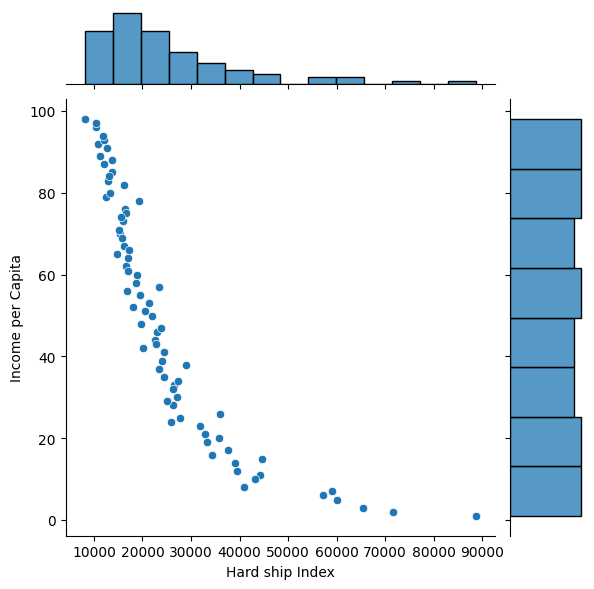

In [106]:
sns.jointplot(x='per_capita_income_', y='hardship_index', data=data)
plt.xlabel('Hard ship Index')
plt.ylabel('Income per Capita')

---
# <b><span style='color:blue'>7. Advanced SQL</span></b>
---

![](view_procedure_transaction.png)

## <b><span style='color:green'>(i) VIEW</span></b>
<code><b>CREATE VIEW</b></code> INFO (col_1, col_2,..) <code><b>AS SELECT</b></code> col_1, col_2,.. FROM table_name;\
<code><b>CREATE OR REPLACE VIEW</b></code> INFO (col_1, col_2,..) <code><b>AS SELECT</b></code> col_1, col_2,.. FROM table_name;\
<code><b>DROP VIEW</b></code> INFO

In [142]:
# Connect to database
import requests
import pandas as pd
from bs4 import BeautifulSoup
import sqlite3
%load_ext sql
conn = sqlite3.connect('FinalDB.db')
cur = conn.cursor()
%sql sqlite:///FinalDB.db
%sql SELECT name, sql FROM sqlite_master;

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [156]:
%%sql 
DROP VIEW IF EXISTS SOME_CRIMES;
CREATE VIEW SOME_CRIMES AS
SELECT ID, CASE_NUMBER, DATE, PRIMARY_TYPE, DESCRIPTION FROM CRIME_DATA;
SELECT * FROM SOME_CRIMES LIMIT 5;

   sqlite:///ChicagoSocEco.db
 * sqlite:///FinalDB.db
   sqlite:///INSTRUCTOR.db
   sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
Done.
Done.
Done.


ID,CASE_NUMBER,DATE,PRIMARY_TYPE,DESCRIPTION
3512276,HK587712,2004-08-28,THEFT,FROM BUILDING
3406613,HK456306,2004-06-26,THEFT,$500 AND UNDER
8002131,HT233595,2011-04-04,THEFT,$500 AND UNDER
7903289,HT133522,2010-12-30,THEFT,FINANCIAL ID THEFT: OVER $300
10402076,HZ138551,2016-02-02,THEFT,$500 AND UNDER


In [ ]:
%sql DROP VIEW SOME_CRIMES;

# <b><span style='color:green'>(ii) PROCEDURE</span></b>

In [164]:
%%sql
CREATE PROCEDURE UPDATE_CRIME (IN PROB CHAR(6), IN PTYPE CHAR(6))
    LANGUAGE SQL
    BEGIN
        IF PROB = 1 THEN
            UPDATE CRIME_DATA
                SET CASE_NUMBER = 'HIEHIE' + SUBSTR(CASE_NUMBER, 3, LEN(CASE_NUMBER)-2)
                WHERE PRIMARY_TYPE = PTYPE;
        ELSE
            UPDATE CRIME_DATA
                SET CASE_NUMBER = 'XIU' + SUBSTR(CASE_NUMBER, 3, LEN(CASE_NUMBER)-2)
                WHERE PRIMARY_TYPE = PTYPE;
        END IF;
    END;


   sqlite:///ChicagoSocEco.db
 * sqlite:///FinalDB.db
   sqlite:///INSTRUCTOR.db
   sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
(sqlite3.OperationalError) near "PROCEDURE": syntax error
[SQL: CREATE PROCEDURE UPDATE_CRIME (IN PROB CHAR(6), IN PTYPE CHAR(6))
    LANGUAGE SQL
    BEGIN
        IF PROB = 1 THEN
            UPDATE CRIME_DATA
                SET CASE_NUMBER = 'HIEHIE' + SUBSTR(CASE_NUMBER, 3, LEN(CASE_NUMBER)-2)
                WHERE PRIMARY_TYPE = PTYPE;
        ELSE
            UPDATE CRIME_DATA
                SET CASE_NUMBER = 'XIU' + SUBSTR(CASE_NUMBER, 3, LEN(CASE_NUMBER)-2)
                WHERE PRIMARY_TYPE = PTYPE;
        END IF;
    END;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [217]:
import sqlite3
%load_ext sql
conn = sqlite3.connect('Pet.db')
cur = conn.cursor()
%sql sqlite:///Pet.db


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [216]:
# pip install mysql.connector
import mysql.connector
conn = mysql.connector.connect(host='localhost', user='root', password='Huy0939650717')
cur = conn.cursor()
%load_ext sql
conn.close()

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [220]:
%%sql
DROP TABLE IF EXISTS PETSALE;

CREATE TABLE PETSALE (
	ID INTEGER NOT NULL,
	ANIMAL VARCHAR(20),
	SALEPRICE DECIMAL(6,2),
	SALEDATE DATE,
	QUANTITY INTEGER,
	PRIMARY KEY (ID)
	);

INSERT INTO PETSALE VALUES
(1,'Cat',450.09,'2018-05-29',9),
(2,'Dog',666.66,'2018-06-01',3),
(3,'Parrot',50.00,'2018-06-04',2),
(4,'Hamster',60.60,'2018-06-11',6),
(5,'Goldfish',48.48,'2018-06-14',24);

SELECT * FROM PETSALE;



   sqlite:///ChicagoSocEco.db
   sqlite:///FinalDB.db
   sqlite:///INSTRUCTOR.db
 * sqlite:///Pet.db
   sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
(sqlite3.OperationalError) database is locked
[SQL: DROP TABLE IF EXISTS PETSALE;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


# <b><span style='color:green'>(iii) ACID TRANSACTION</span></b>
|||
|-|-|
|![](ACID.png)|![](ACID_transaction.png)|

# <b><span style='color:green'>(iv) JOIN</span></b>

<code><b>SELECT</b></code> A.col_1, B.col_2 <code><b>FROM</b></code> data_1 A [...] data_2 B <code><b>ON</b></code>A.ID = B.ID;

|[...]|
|-|
|INNER JOIN|
|LEFT OUTER JOIN/RIGHT OUTER JOIN|
|FULL OUTER JOIN/CROSS JOIN|


In [244]:
import sqlite3
%load_ext sql

conn = sqlite3.connect('ChicagoSocEco.db')
cur = conn.cursor()
%sql sqlite:///ChicagoSocEco.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [250]:
%sql SELECT name, sql FROM sqlite_master;

 * sqlite:///ChicagoSocEco.db
   sqlite:///FinalDB.db
   sqlite:///INSTRUCTOR.db
   sqlite:///Pet.db
   sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
Done.


name,sql
ChicagoSocEco_data,"CREATE TABLE ""ChicagoSocEco_data"" (""ca"" REAL, ""community_area_name"" TEXT, ""percent_of_housing_crowded"" REAL, ""percent_households_below_poverty"" REAL, ""percent_aged_16_unemployed"" REAL, ""percent_aged_25_without_high_school_diploma"" REAL, ""percent_aged_under_18_or_over_64"" REAL, ""per_capita_income_"" INTEGER, ""hardship_index"" REAL)"
PubSchool_data,"CREATE TABLE ""PubSchool_data"" (""School_ID"" INTEGER, ""NAME_OF_SCHOOL"" TEXT, ""Elementary, Middle, or High School"" TEXT, ""Street_Address"" TEXT, ""City"" TEXT, ""State"" TEXT, ""ZIP_Code"" INTEGER, ""Phone_Number"" TEXT, ""Link"" TEXT, ""Network_Manager"" TEXT, ""Collaborative_Name"" TEXT, ""Adequate_Yearly_Progress_Made_"" TEXT, ""Track_Schedule"" TEXT, ""CPS_Performance_Policy_Status"" TEXT, ""CPS_Performance_Policy_Level"" TEXT, ""HEALTHY_SCHOOL_CERTIFIED"" TEXT, ""Safety_Icon"" TEXT, ""SAFETY_SCORE"" REAL, ""Family_Involvement_Icon"" TEXT, ""Family_Involvement_Score"" TEXT, ""Environment_Icon"" TEXT, ""Environment_Score"" REAL, ""Instruction_Icon"" TEXT, ""Instruction_Score"" REAL, ""Leaders_Icon"" TEXT, ""Leaders_Score"" TEXT, ""Teachers_Icon"" TEXT, ""Teachers_Score"" TEXT, ""Parent_Engagement_Icon"" TEXT, ""Parent_Engagement_Score"" TEXT, ""Parent_Environment_Icon"" TEXT, ""Parent_Environment_Score"" TEXT, ""AVERAGE_STUDENT_ATTENDANCE"" TEXT, ""Rate_of_Misconducts__per_100_students_"" REAL, ""Average_Teacher_Attendance"" TEXT, ""Individualized_Education_Program_Compliance_Rate"" TEXT, ""Pk_2_Literacy__"" TEXT, ""Pk_2_Math__"" TEXT, ""Gr3_5_Grade_Level_Math__"" TEXT, ""Gr3_5_Grade_Level_Read__"" TEXT, ""Gr3_5_Keep_Pace_Read__"" TEXT, ""Gr3_5_Keep_Pace_Math__"" TEXT, ""Gr6_8_Grade_Level_Math__"" TEXT, ""Gr6_8_Grade_Level_Read__"" TEXT, ""Gr6_8_Keep_Pace_Math_"" TEXT, ""Gr6_8_Keep_Pace_Read__"" TEXT, ""Gr_8_Explore_Math__"" TEXT, ""Gr_8_Explore_Read__"" TEXT, ""ISAT_Exceeding_Math__"" REAL, ""ISAT_Exceeding_Reading__"" REAL, ""ISAT_Value_Add_Math"" REAL, ""ISAT_Value_Add_Read"" REAL, ""ISAT_Value_Add_Color_Math"" TEXT, ""ISAT_Value_Add_Color_Read"" TEXT, ""Students_Taking__Algebra__"" TEXT, ""Students_Passing__Algebra__"" TEXT, ""9th Grade EXPLORE (2009)"" TEXT, ""9th Grade EXPLORE (2010)"" TEXT, ""10th Grade PLAN (2009)"" TEXT, ""10th Grade PLAN (2010)"" TEXT, ""Net_Change_EXPLORE_and_PLAN"" TEXT, ""11th Grade Average ACT (2011)"" TEXT, ""Net_Change_PLAN_and_ACT"" TEXT, ""College_Eligibility__"" TEXT, ""Graduation_Rate__"" TEXT, ""College_Enrollment_Rate__"" TEXT, ""COLLEGE_ENROLLMENT"" INTEGER, ""General_Services_Route"" INTEGER, ""Freshman_on_Track_Rate__"" TEXT, ""X_COORDINATE"" REAL, ""Y_COORDINATE"" REAL, ""Latitude"" REAL, ""Longitude"" REAL, ""COMMUNITY_AREA_NUMBER"" INTEGER, ""COMMUNITY_AREA_NAME"" TEXT, ""Ward"" INTEGER, ""Police_District"" INTEGER, ""Location"" TEXT)"
Census_data,"CREATE TABLE ""Census_data"" (""COMMUNITY_AREA_NUMBER"" REAL, ""COMMUNITY_AREA_NAME"" TEXT, ""PERCENT_OF_HOUSING_CROWDED"" REAL, ""PERCENT_HOUSEHOLDS_BELOW_POVERTY"" REAL, ""PERCENT_AGED_16__UNEMPLOYED"" REAL, ""PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA"" REAL, ""PERCENT_AGED_UNDER_18_OR_OVER_64"" REAL, ""PER_CAPITA_INCOME"" INTEGER, ""HARDSHIP_INDEX"" REAL)"
Crime_data,"CREATE TABLE ""Crime_data"" (""ID"" INTEGER, ""CASE_NUMBER"" TEXT, ""DATE"" TEXT, ""BLOCK"" TEXT, ""IUCR"" TEXT, ""PRIMARY_TYPE"" TEXT, ""DESCRIPTION"" TEXT, ""LOCATION_DESCRIPTION"" TEXT, ""ARREST"" INTEGER, ""DOMESTIC"" INTEGER, ""BEAT"" INTEGER, ""DISTRICT"" INTEGER, ""WARD"" REAL, ""COMMUNITY_AREA_NUMBER"" REAL, ""FBICODE"" TEXT, ""X_COORDINATE"" REAL, ""Y_COORDINATE"" REAL, ""YEAR"" INTEGER, ""LATITUDE"" REAL, ""LONGITUDE"" REAL, ""LOCATION"" TEXT)"


In [258]:
%sql SELECT CD.CASE_NUMBER, CD.PRIMARY_TYPE, CS.COMMUNITY_AREA_NAME FROM CRIME_DATA CD INNER JOIN CENSUS_DATA CS\
ON CD.COMMUNITY_AREA_NUMBER = CS.COMMUNITY_AREA_NUMBER WHERE CS.COMMUNITY_AREA_NUMBER = 18;

 * sqlite:///ChicagoSocEco.db
   sqlite:///FinalDB.db
   sqlite:///INSTRUCTOR.db
   sqlite:///Pet.db
   sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
Done.


CASE_NUMBER,PRIMARY_TYPE,COMMUNITY_AREA_NAME
JA560123,CRIMINAL DAMAGE,Montclaire
JA107722,OTHER OFFENSE,Montclaire


In [261]:
%sql SELECT CD.CASE_NUMBER, CD.PRIMARY_TYPE, CS.COMMUNITY_AREA_NAME\
FROM CRIME_DATA CD INNER JOIN CENSUS_DATA CS\
ON CD.COMMUNITY_AREA_NUMBER = CS.COMMUNITY_AREA_NUMBER WHERE CD.LOCATION_DESCRIPTION LIKE '%SCHOOL%';

 * sqlite:///ChicagoSocEco.db
   sqlite:///FinalDB.db
   sqlite:///INSTRUCTOR.db
   sqlite:///Pet.db
   sqlite:///RealWorldData.db
   sqlite:///SQLiteMagic.db
Done.


CASE_NUMBER,PRIMARY_TYPE,COMMUNITY_AREA_NAME
HL353697,BATTERY,South Shore
HL725506,BATTERY,Lincoln Square
HP716225,BATTERY,Douglas
HH639427,BATTERY,Austin
JA460432,BATTERY,Ashburn
HS200939,CRIMINAL DAMAGE,Austin
HK577020,NARCOTICS,Rogers Park
HS305355,NARCOTICS,Brighton Park
HT315369,ASSAULT,East Garfield Park
HR585012,CRIMINAL TRESPASS,Ashburn
